# 0. Introduction
NIH released the chest X-ray [dataset](https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community)
Files are extracted in the **'data'** and and the images are extracted in the **'images'** folders.


In [39]:
# # Download the 56 zip files in Images_png in batches
# import urllib

# # URLs for the zip files
# links = [
#     'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
#     'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
#     'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
#     'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
#     'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
#     'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
#     'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
#     'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
#     'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
#     'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
#     'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
#     'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
# ]

# for idx, link in enumerate(links):
#     fn = 'images_%02d.tar.gz' % (idx+1)
#     print('downloading', fn, '...')
#     urllib.request.urlretrieve(link, fn)  # download the zip file
# print("Download complete. Please check the checksums")

## Loading Prerequisites and Libraries 

Standard Imports:  
Plotly is configured to run in the offline mode.  
Pandas is chosen to for manipulating csv files.  
Numpy is for the arithmetic applications.

Visualizations:  
Most of the visualizations are done via matplotlib, seaborn and plotly.   

Custom Functions:  
All additional functions and code are written and imported from the **eda_xray.py** file.

In [58]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact
import plotly_express as px
import plotly.graph_objs as go
import plotly.offline
%matplotlib inline
import matplotlib.cm as cm  # allows us easy access to colormaps
import matplotlib.pyplot as plt  # sets up plotting under plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")
from itertools import chain
from eda_xray import load_xray
import os
import shutil
%load_ext autoreload
%autoreload 2
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('precision', 5)
InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ColorPicker(value='blue', description='Pick a color')

There is a total of 112120 images on the NIH dataset.

In [5]:
# creating image location and looking for the number of the images
img_location = 'data/images'
imgs = [file for file in os.listdir(img_location) if file.endswith('.png')]
len(imgs)

112120

## Importing data and renaming/dropping columns

The function **load_xray** does the following:
1. imports the css
2. renames the columns to lower letter
3. drops the last empty column
4. adds a new columns caled **'path'** that has the x-rays *image*.png* location

In [53]:
data = 'data/Data_Entry_2017.csv'
df = load_xray(data)
df.sample(5)

,imgindex,label,followup,patientID,age,gender,viewposition,width,height],x,y,path
87230,00021541_000.png,Infiltration,0,21541,63,M,PA,2992,2991,0.143,0.143,data/images/00021541_000.png
6899,00001836_085.png,No Finding,85,1836,50,F,AP,2500,2048,0.168,0.168,data/images/00001836_085.png
47717,00012094_034.png,Infiltration,34,12094,63,F,PA,2500,2048,0.168,0.168,data/images/00012094_034.png
35978,00009493_000.png,Pleural_Thickening,0,9493,60,F,PA,2048,2500,0.168,0.168,data/images/00009493_000.png
18764,00004984_000.png,Infiltration,0,4984,24,F,PA,2048,2500,0.171,0.171,data/images/00004984_000.png


There are 836 different combinations of labeling among the x-rays.

### Unique values of x-ray abnormalities and choosing a subset

There 836 unique values in the labels and these values have several different groupings of the abnormalities. 

In [54]:
df.label.nunique()

836

If we don't the consider the multilabel abnormalities, we'd have 14 labels plus the *'No Finding'* classification.

No Finding            60361
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: label, dtype: int64


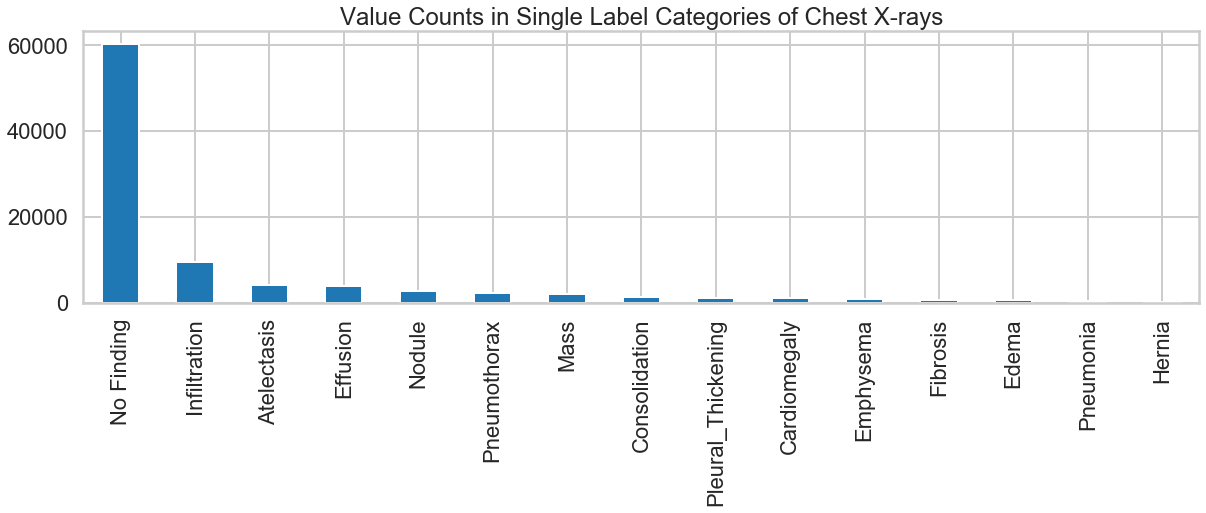

In [59]:
print(df[df.label.isin(['No Finding', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
                  'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia',
                  'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
                  'Pneumothorax'])].label.value_counts())
df[df.label.isin(['No Finding', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
                  'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia',
                  'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
                  'Pneumothorax'])].label.value_counts().plot(kind='bar',
                                                              figsize=(20, 5),
                                                              title='Value Counts in Single Label Categories of Chest X-rays');

By Looking at the dataset we can see there's more than 60,000 values for the *'No Finding'* label.
To have a subset we randomly sample 10,000 values of this label and concat with the other single labels.

In [56]:
df_subset = pd.concat((df[df.label == 'No Finding'].sample(10000, random_state=42),
                       df[df.label.isin(['Atelectasis','Cardiomegaly','Consolidation',
                                         'Edema','Effusion','Emphysema','Fibrosis',
                                         'Hernia','Infiltration','Mass','Nodule',
                                         'Pleural_Thickening','Pneumonia','Pneumothorax'])]))

No Finding            10000
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: label, dtype: int64


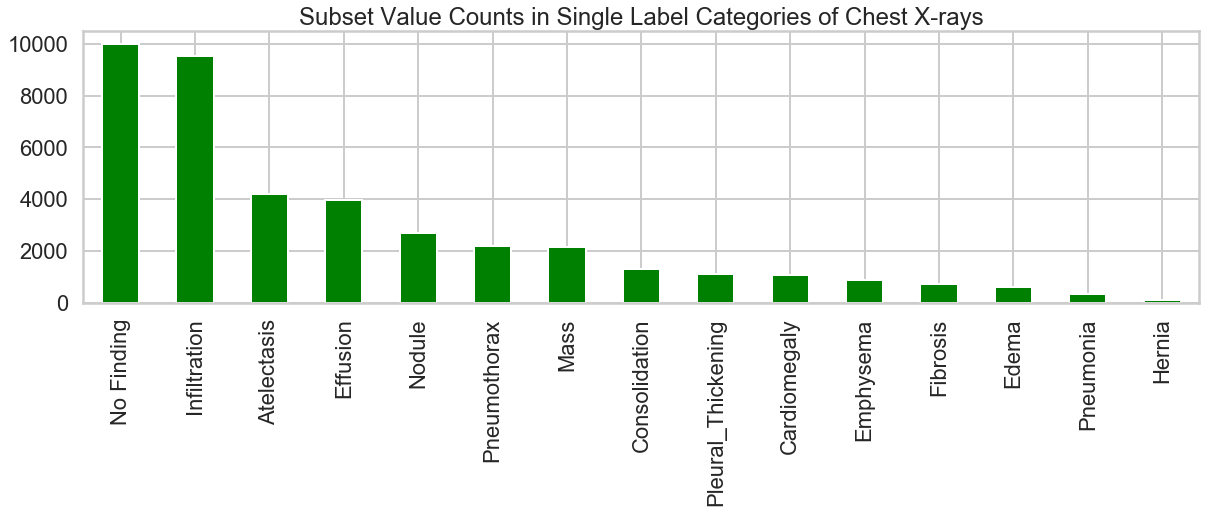

In [60]:
print(df_subset.label.value_counts())
df_subset.label.value_counts().plot(kind='bar',
                                    figsize=(20, 5),
                                    color='g',
                                    title='Subset Value Counts in Single Label Categories of Chest X-rays');


The created subset has a total of 40963 values, which close to a third of the original dataset. Thus in total we have chosen **%36.53** of the original dataframe. 

In [19]:
print('# of rows in the subset dataframe: ', df_subset.shape[0])
print('\n# of rows in the original dataframe: ', df.shape[0])
print('\npercentage subset of the original: ', df_subset.shape[0]/df.shape[0]*100)

# of rows in the subset dataframe:  40963

# of rows in the original dataframe:  112120

percentage subset of the original:  36.53496254013557


## Output to CSV & Pickle & HD5

In [38]:
#overwriting the df variable name with the df_subset for easier manipulation
df = df_subset


## CLAHE - Contrast Limited Adaptive Histogram Equalization  

We apply the CLAHE [(Contrast Limited Adaptive Histogram Equalization)](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization) method, which is a popular image processing method to improve contrast in images and limit the noise amplification of the regular adaptive method.


In [20]:
from cv2 import imread, imwrite,imshow,  createCLAHE, equalizeHist # read and equalize images
import numpy as np

(array([20027.,   951.,  1122.,  2154.,  4369.,  5131.,  4594.,  6260.,
         8356., 25956.,  9749.,  2026.,  2157.,  2552.,  2589.,  2735.,
         2727.,  2756.,  2921.,  3138.,  3432.,  3600.,  3643.,  3901.,
         3895.,  4011.,  4114.,  4324.,  4388.,  4679.,  4791.,  5010.,
         5078.,  4781.,  4685.,  4581.,  4529.,  4434.,  4335.,  4228.,
         4126.,  4108.,  3965.,  3816.,  3714.,  3686.,  3668.,  3686.,
         3490.,  3503.,  3489.,  3442.,  3540.,  3572.,  3686.,  3635.,
         3709.,  3604.,  3674.,  3828.,  3820.,  3848.,  3870.,  3832.,
         3885.,  3988.,  4048.,  4038.,  4148.,  4086.,  3881.,  3881.,
         3715.,  3800.,  3689.,  3731.,  3618.,  3639.,  3535.,  3729.,
         3714.,  3794.,  3919.,  3877.,  3886.,  3963.,  3650.,  3801.,
         3830.,  3733.,  3840.,  3787.,  3788.,  3610.,  3650.,  3664.,
         3590.,  3750.,  3528.,  3719.,  3748.,  3833.,  3650.,  3571.,
         3618.,  3581.,  3448.,  3382.,  3459.,  3326.,  3400., 

(0, 256)

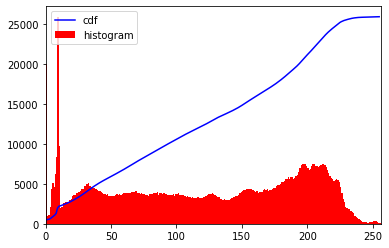

(array([1.07113e+05, 7.25620e+04, 4.52900e+03, 2.23600e+03, 2.25000e+03,
        2.17100e+03, 2.11400e+03, 1.94800e+03, 2.09000e+03, 1.99900e+03,
        1.89700e+03, 1.94800e+03, 1.97000e+03, 1.93300e+03, 1.93700e+03,
        1.96400e+03, 2.00300e+03, 2.09800e+03, 2.22600e+03, 2.43500e+03,
        2.43600e+03, 2.46700e+03, 2.65300e+03, 2.65200e+03, 2.75700e+03,
        2.75500e+03, 2.80300e+03, 2.95600e+03, 3.12400e+03, 3.18400e+03,
        3.29200e+03, 3.40100e+03, 3.37200e+03, 3.47000e+03, 3.47500e+03,
        3.48600e+03, 3.68300e+03, 3.72500e+03, 4.01700e+03, 3.83300e+03,
        3.85500e+03, 3.53000e+03, 3.55400e+03, 3.59500e+03, 3.64000e+03,
        3.59600e+03, 3.59600e+03, 3.69600e+03, 3.70100e+03, 3.73500e+03,
        3.71200e+03, 3.81500e+03, 3.83800e+03, 3.97300e+03, 3.91100e+03,
        4.03800e+03, 4.15100e+03, 4.15800e+03, 4.08300e+03, 4.12400e+03,
        4.01800e+03, 4.04100e+03, 4.14900e+03, 4.13400e+03, 4.11500e+03,
        4.18000e+03, 4.25600e+03, 4.07100e+03, 4.08

(0, 256)

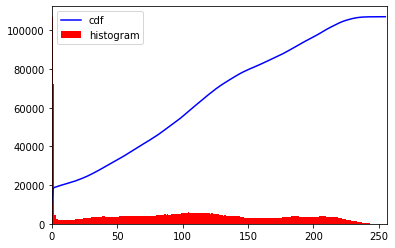

(array([2.1536e+04, 1.9000e+02, 9.4500e+02, 2.2400e+03, 3.0970e+03,
        4.4620e+03, 5.7990e+03, 5.8950e+03, 7.2300e+03, 7.7860e+03,
        9.8430e+03, 1.0467e+04, 6.2320e+03, 2.7160e+03, 1.6420e+03,
        1.4760e+03, 1.4200e+03, 1.4150e+03, 1.4190e+03, 1.3570e+03,
        1.2510e+03, 1.2400e+03, 1.1450e+03, 1.0230e+03, 1.0580e+03,
        9.5100e+02, 9.4700e+02, 9.5200e+02, 9.5200e+02, 1.0270e+03,
        1.0470e+03, 1.1610e+03, 1.1020e+03, 1.1990e+03, 1.2910e+03,
        1.3810e+03, 1.4920e+03, 1.5850e+03, 1.5660e+03, 1.7640e+03,
        1.8080e+03, 2.0030e+03, 2.2540e+03, 2.2110e+03, 2.2880e+03,
        2.5150e+03, 2.6360e+03, 2.7270e+03, 2.9650e+03, 3.0660e+03,
        3.2170e+03, 3.3630e+03, 3.3460e+03, 3.3380e+03, 3.4530e+03,
        3.4800e+03, 3.4350e+03, 3.5600e+03, 3.6000e+03, 3.7610e+03,
        3.7940e+03, 4.1060e+03, 4.1830e+03, 4.3020e+03, 4.2700e+03,
        4.5400e+03, 4.5770e+03, 4.7620e+03, 4.8630e+03, 4.9920e+03,
        5.1510e+03, 5.3390e+03, 5.4890e+03, 5.46

(0, 256)

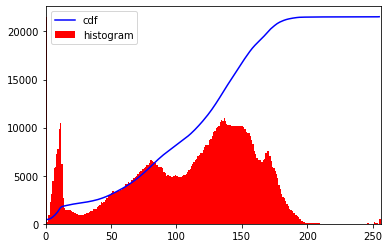

(array([5.8134e+04, 4.2020e+03, 2.0230e+03, 1.7100e+03, 1.5140e+03,
        1.4480e+03, 1.3990e+03, 1.4220e+03, 1.3620e+03, 1.2150e+03,
        1.1870e+03, 1.2290e+03, 1.2500e+03, 1.2570e+03, 1.2530e+03,
        1.2930e+03, 1.4330e+03, 1.4020e+03, 1.4610e+03, 1.5670e+03,
        1.6120e+03, 1.7530e+03, 1.8280e+03, 1.8650e+03, 1.9360e+03,
        1.9590e+03, 2.1630e+03, 2.1930e+03, 2.2170e+03, 2.3130e+03,
        2.3100e+03, 2.2880e+03, 2.2170e+03, 2.3040e+03, 2.3730e+03,
        2.5220e+03, 2.6300e+03, 2.6070e+03, 2.7090e+03, 2.6840e+03,
        2.7240e+03, 2.6280e+03, 2.7360e+03, 2.5750e+03, 2.6660e+03,
        2.6560e+03, 2.7840e+03, 2.8060e+03, 2.9130e+03, 3.0320e+03,
        2.9880e+03, 3.0280e+03, 3.1610e+03, 3.1090e+03, 3.2190e+03,
        3.2250e+03, 3.3110e+03, 3.1980e+03, 3.2230e+03, 3.1870e+03,
        3.1610e+03, 3.1900e+03, 3.2590e+03, 3.1800e+03, 3.1640e+03,
        3.1420e+03, 3.0600e+03, 2.9730e+03, 2.9180e+03, 3.0570e+03,
        3.0390e+03, 3.0980e+03, 3.0850e+03, 3.14

(0, 256)

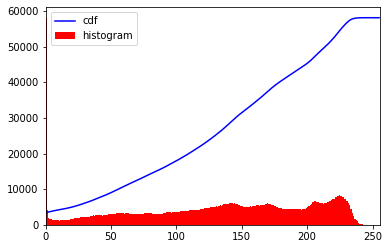

(array([6.0378e+04, 1.1000e+01, 1.4000e+01, 5.6000e+01, 7.2000e+01,
        5.9000e+01, 5.9000e+01, 4.2400e+02, 4.0370e+03, 4.0270e+03,
        5.0690e+03, 3.6800e+03, 2.7530e+03, 2.5600e+03, 2.5950e+03,
        2.8500e+03, 2.5000e+03, 1.9380e+03, 1.9410e+03, 1.9770e+03,
        1.7370e+03, 1.7240e+03, 1.4510e+03, 1.1210e+03, 1.1610e+03,
        1.0990e+03, 1.0790e+03, 1.1220e+03, 1.0170e+03, 1.0030e+03,
        1.0300e+03, 1.0160e+03, 1.0590e+03, 9.5000e+02, 7.9400e+02,
        8.6800e+02, 9.6100e+02, 8.7800e+02, 7.5400e+02, 8.0300e+02,
        8.0000e+02, 7.3700e+02, 8.0500e+02, 7.4400e+02, 7.9400e+02,
        7.9000e+02, 8.2400e+02, 7.9900e+02, 8.7100e+02, 8.6500e+02,
        8.7700e+02, 7.9900e+02, 8.7600e+02, 8.4800e+02, 8.9100e+02,
        8.6900e+02, 9.2600e+02, 1.0190e+03, 1.0870e+03, 1.1540e+03,
        1.2720e+03, 1.4270e+03, 1.5220e+03, 1.5470e+03, 1.4840e+03,
        1.4710e+03, 1.5860e+03, 1.5490e+03, 1.6610e+03, 1.6880e+03,
        1.7520e+03, 1.7830e+03, 1.8510e+03, 1.89

(0, 256)

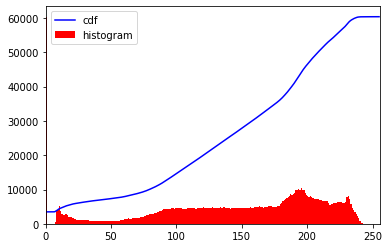

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5000e+01,
        4.7000e+01, 1.4900e+02, 2.3700e+02, 2.7300e+02, 9.3600e+02,
        1.9040e+03, 3.4620e+03, 5.9600e+03, 9.3570e+03, 8.2150e+03,
        4.9240e+03, 3.0430e+03, 2.7660e+03, 2.6880e+03, 2.4790e+03,
        2.3460e+03, 2.1070e+03, 1.9120e+03, 1.5490e+03, 1.4510e+03,
        1.4740e+03, 1.2540e+03, 1.1160e+03, 9.4800e+02, 7.7200e+02,
        6.9300e+02, 6.3800e+02, 5.7000e+02, 6.1400e+02, 5.6400e+02,
        6.0200e+02, 5.9200e+02, 6.0500e+02, 5.5600e+02, 6.2400e+02,
        5.5400e+02, 5.9000e+02, 5.6300e+02, 5.5600e+02, 5.7400e+02,
        5.6500e+02, 5.9900e+02, 5.7800e+02, 5.9500e+02, 5.9800e+02,
        5.6900e+02, 6.0500e+02, 6.0700e+02, 5.1600e+02, 5.3600e+02,
        4.8900e+02, 5.1600e+02, 5.2400e+02, 5.2100e+02, 4.7700e+02,
        5.1300e+02, 4.8300e+02, 5.4100e+02, 5.2400e+02, 5.8600e+02,
        5.6300e+02, 5.6100e+02, 5.7300e+02, 5.7000e+02, 6.1400e+02,
        6.1900e+02, 6.1800e+02, 6.1200e+02, 6.03

(0, 256)

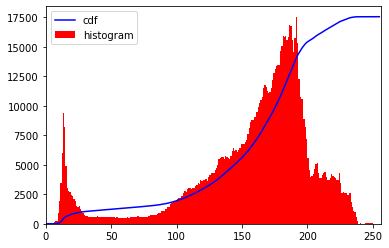

(array([2.6195e+04, 6.8300e+02, 2.6300e+02, 5.1100e+02, 1.4970e+03,
        3.6170e+03, 3.9690e+03, 4.1470e+03, 9.9960e+03, 5.2610e+03,
        3.2100e+02, 3.0200e+02, 3.2900e+02, 3.6200e+02, 3.3600e+02,
        4.3600e+02, 5.3200e+02, 5.0600e+02, 4.4000e+02, 4.8900e+02,
        4.6900e+02, 5.5800e+02, 6.6000e+02, 6.6000e+02, 7.6900e+02,
        8.0200e+02, 8.5400e+02, 7.9600e+02, 7.1200e+02, 7.5400e+02,
        8.4300e+02, 8.3700e+02, 9.4900e+02, 9.5400e+02, 9.8700e+02,
        1.0510e+03, 1.0350e+03, 1.0470e+03, 1.1340e+03, 1.2370e+03,
        1.4030e+03, 1.4790e+03, 1.6700e+03, 1.5650e+03, 1.4370e+03,
        1.3530e+03, 1.2320e+03, 1.3160e+03, 1.1620e+03, 1.0820e+03,
        1.1240e+03, 1.2550e+03, 1.4920e+03, 1.6390e+03, 1.7820e+03,
        1.9320e+03, 2.2090e+03, 2.4190e+03, 2.6220e+03, 2.7640e+03,
        2.9050e+03, 3.1020e+03, 3.3270e+03, 3.4740e+03, 3.6000e+03,
        3.8690e+03, 3.8100e+03, 3.9390e+03, 3.8230e+03, 3.8750e+03,
        4.0390e+03, 4.2010e+03, 4.1800e+03, 4.11

(0, 256)

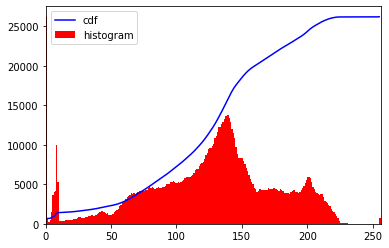

(array([4.416e+03, 3.900e+01, 3.099e+03, 1.093e+03, 6.840e+02, 5.000e+02,
        6.040e+02, 8.650e+02, 8.530e+02, 9.930e+02, 9.820e+02, 1.062e+03,
        1.126e+03, 1.328e+03, 1.425e+03, 1.523e+03, 1.547e+03, 1.775e+03,
        1.627e+03, 1.399e+03, 1.455e+03, 1.766e+03, 1.727e+03, 1.904e+03,
        2.112e+03, 2.467e+03, 2.516e+03, 2.513e+03, 2.734e+03, 2.990e+03,
        3.066e+03, 3.670e+03, 3.882e+03, 3.701e+03, 3.532e+03, 3.282e+03,
        3.102e+03, 2.942e+03, 2.902e+03, 3.042e+03, 2.856e+03, 2.939e+03,
        2.821e+03, 2.740e+03, 2.662e+03, 2.816e+03, 2.979e+03, 2.940e+03,
        3.130e+03, 3.214e+03, 3.378e+03, 3.174e+03, 3.089e+03, 3.229e+03,
        3.470e+03, 3.289e+03, 3.267e+03, 3.103e+03, 3.062e+03, 3.043e+03,
        2.978e+03, 2.989e+03, 3.026e+03, 3.068e+03, 3.299e+03, 3.279e+03,
        3.387e+03, 3.506e+03, 3.619e+03, 3.764e+03, 3.989e+03, 4.265e+03,
        4.500e+03, 4.746e+03, 4.953e+03, 5.162e+03, 5.177e+03, 5.198e+03,
        5.120e+03, 5.061e+03, 4.669e+0

(0, 256)

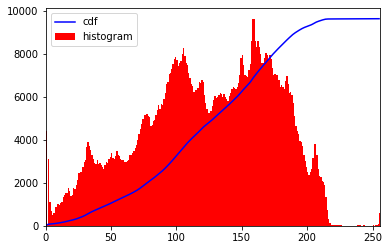

(array([2.3980e+03, 0.0000e+00, 2.0000e+00, 5.9000e+01, 2.7000e+02,
        5.1900e+02, 2.3800e+02, 1.8600e+02, 1.6100e+02, 1.4000e+02,
        1.1800e+02, 1.1500e+02, 1.2200e+02, 2.1600e+02, 3.0000e+02,
        2.5700e+02, 2.4900e+02, 2.4900e+02, 2.1400e+02, 2.0100e+02,
        1.9900e+02, 2.1300e+02, 2.2700e+02, 2.0700e+02, 2.1800e+02,
        2.6800e+02, 2.8400e+02, 3.2800e+02, 3.6000e+02, 3.9800e+02,
        4.0900e+02, 4.3900e+02, 4.1900e+02, 4.3600e+02, 4.2100e+02,
        3.9700e+02, 3.8900e+02, 3.8800e+02, 3.7500e+02, 3.8200e+02,
        3.9300e+02, 4.4300e+02, 4.1800e+02, 4.3300e+02, 4.8400e+02,
        4.5700e+02, 4.4800e+02, 4.4400e+02, 4.3900e+02, 4.1200e+02,
        4.8100e+02, 4.6200e+02, 4.1600e+02, 4.1300e+02, 3.8700e+02,
        3.7600e+02, 4.0300e+02, 4.1300e+02, 4.0700e+02, 4.6500e+02,
        4.4100e+02, 5.3200e+02, 6.3500e+02, 6.0100e+02, 7.2600e+02,
        7.5500e+02, 8.1700e+02, 8.4000e+02, 9.0600e+02, 1.0680e+03,
        1.1420e+03, 1.1570e+03, 1.2690e+03, 1.34

(0, 256)

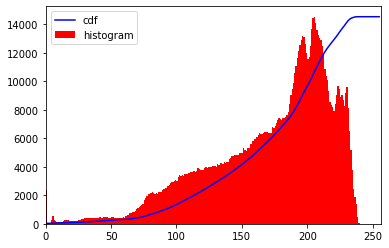

(array([16543.,    61.,    42.,   163.,  2531.,  5724.,  6654.,  2184.,
          276.,   221.,   241.,   253.,   256.,   235.,   271.,   286.,
          259.,   296.,   375.,   393.,   484.,   564.,   505.,   485.,
          532.,   458.,   446.,   483.,   415.,   384.,   411.,   395.,
          383.,   379.,   362.,   364.,   335.,   367.,   356.,   358.,
          403.,   388.,   403.,   380.,   421.,   369.,   371.,   388.,
          408.,   368.,   408.,   373.,   365.,   356.,   403.,   352.,
          379.,   381.,   409.,   419.,   430.,   444.,   502.,   558.,
          633.,   666.,   759.,   765.,   749.,   832.,   783.,   939.,
          995.,  1039.,  1058.,  1120.,  1243.,  1400.,  1549.,  1689.,
         1828.,  1913.,  1960.,  1884.,  1995.,  2093.,  2255.,  2446.,
         2435.,  2577.,  2596.,  2543.,  2620.,  2604.,  2421.,  2469.,
         2515.,  2524.,  2502.,  2621.,  2552.,  2548.,  2585.,  2561.,
         2676.,  2900.,  3147.,  3413.,  3780.,  4019.,  4127., 

(0, 256)

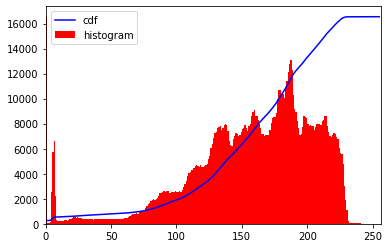

(array([1.9080e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.9800e+02, 6.7500e+02, 1.3070e+03, 2.1900e+03,
        2.0310e+03, 1.3160e+03, 9.6700e+02, 7.5500e+02, 6.5900e+02,
        5.2800e+02, 4.3300e+02, 3.1700e+02, 2.7800e+02, 2.0500e+02,
        2.6400e+02, 2.5100e+02, 1.8300e+02, 2.2000e+02, 2.3300e+02,
        2.1600e+02, 2.6900e+02, 2.9400e+02, 3.0100e+02, 2.7800e+02,
        2.6500e+02, 2.7200e+02, 2.6900e+02, 3.4900e+02, 3.4300e+02,
        3.8200e+02, 3.7900e+02, 3.9600e+02, 3.9400e+02, 4.5500e+02,
        3.9600e+02, 4.3300e+02, 4.5500e+02, 4.6000e+02, 4.9000e+02,
        5.3700e+02, 5.0300e+02, 5.2900e+02, 5.1500e+02, 5.1500e+02,
        5.3200e+02, 6.4800e+02, 5.9700e+02, 6.6600e+02, 8.9400e+02,
        8.9000e+02, 7.9500e+02, 8.0600e+02, 7.7400e+02, 8.1800e+02,
        8.5600e+02, 8.3400e+02, 9.3300e+02, 9.8300e+02, 1.0670e+03,
        1.0410e+03, 1.1230e+03, 1.1500e+03, 1.2860e+03, 1.4060e+03,
        1.5000e+03, 1.6440e+03, 1.6570e+03, 1.60

(0, 256)

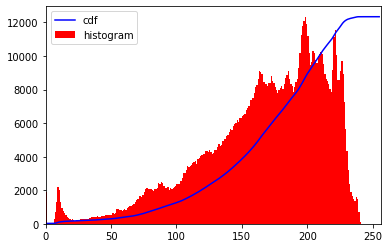

(array([2.6551e+04, 3.2290e+03, 3.6480e+03, 4.7870e+03, 5.6210e+03,
        8.2290e+03, 7.6850e+03, 6.8430e+03, 1.8641e+04, 8.3190e+03,
        1.3880e+03, 1.3020e+03, 1.1420e+03, 1.1040e+03, 1.1730e+03,
        1.1980e+03, 1.1770e+03, 1.1340e+03, 1.0300e+03, 9.7900e+02,
        1.0370e+03, 1.1860e+03, 1.1010e+03, 1.0330e+03, 1.0460e+03,
        1.0830e+03, 1.1750e+03, 1.3740e+03, 1.5070e+03, 1.7310e+03,
        1.7950e+03, 2.0050e+03, 2.2080e+03, 2.3280e+03, 2.5660e+03,
        2.7080e+03, 3.0030e+03, 2.9690e+03, 3.2890e+03, 3.4640e+03,
        3.4570e+03, 3.7280e+03, 3.9030e+03, 4.1600e+03, 4.3330e+03,
        4.4340e+03, 4.5430e+03, 4.7750e+03, 5.0590e+03, 5.1080e+03,
        5.1910e+03, 5.4680e+03, 5.4960e+03, 5.5510e+03, 5.5240e+03,
        5.6580e+03, 5.4920e+03, 5.8590e+03, 5.7920e+03, 5.6610e+03,
        5.6920e+03, 5.6890e+03, 5.4780e+03, 5.5550e+03, 5.5730e+03,
        5.3960e+03, 5.5260e+03, 5.3900e+03, 5.1860e+03, 5.2040e+03,
        5.1340e+03, 4.9470e+03, 5.0290e+03, 4.81

(0, 256)

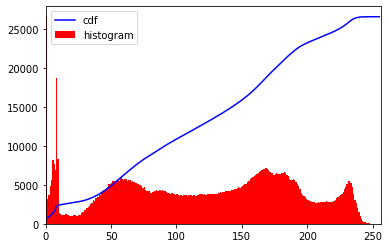

In [46]:
for path in df.sample(12, random_state=42).path.values:
    img = imread(path, 0)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color='b')
    plt.hist(img.flatten(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc='upper left')
    plt.show();

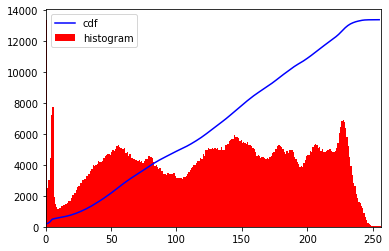

In [23]:


img = imread('data/images/00000001_000.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show();

In [194]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# Now we have the look-up table that gives us the information on what is the output pixel value for every input pixel value. So we just apply the transform.

img2 = cdf[img]

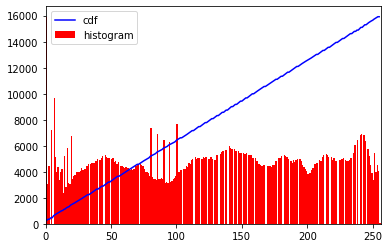

In [196]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [206]:
img = imread('data/images/00000001_000.png',0)
equ = equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
imwrite(res)

TypeError: imshow() missing required argument 'mat' (pos 2)

In [ ]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling)
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling)
model.add(Convolution2D(62, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling)
model.add(Flatten())
model.add(Dense(64))
model.aa(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))  # or softmax?
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', metrics='accuracy')
# backward propagating based on loss function
model.fit(.....)


train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../input/train/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


# classic CNN looks like this:
# input>conv>reLU>conv>reLU>pool>relu>conv>pool>fullyconnected
# common technique to avoid overfitting is to use dropout filters. it uses a random set of activation filters
# by settin ghtme to 0 as data flows through


# pooling reduces the dimensionality of each feature map but keeps the largest feature
# reLU replace all negative values with zero

# our filter is our feature identifier or basically the weights we assign

# all you have to do is to create a small filter and convert it to an array

In [ ]:
# create validation set from the training set.


# make sure to batch normalize & renormalize across all the inputs

# smaller batch size (32) leads to much better results